<a href="https://colab.research.google.com/github/shubhamk2001/Deep-Learning-Basics/blob/main/CNN(Cifar10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf # Import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
# Use tf.keras.preprocessing.image.ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

In [ ]:
# Setting variable learning rate
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# z-score normalization
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

In [ ]:
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)

In [ ]:
# Building convolutional neural network model

#This is setting a small value for L2 regularization, which adds a penalty term to the loss function based on the squared sum of the weights.
#This helps prevent overfitting by discouraging overly complex models.
weight_decay = 1e-4
# Creates a Sequential model where layers are added one after the other.
model = Sequential()
# regularizers.l2(weight_decay): It helps to limit the magnitude of the weights.
# This is a 2D Convolutional layer with 32 filters (or kernels), each of size 3x3.
# padding='same': Ensures that the output of the convolutional layer has the same spatial dimensions (height and width) as the input.
# input_shape=X_train.shape[1:]: This specifies the shape of the input images, excluding the batch size. Usually for color images,
# this would be something like (height, width, channels), e.g., (28, 28, 1) for grayscale images in MNIST.
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
# Adds an ELU (Exponential Linear Unit) activation function. This is an advanced activation function that performs
# better than ReLU in some cases, especially with deep networks, by reducing the chances of vanishing gradients.
model.add(Activation('elu'))
# Normalizes the activations of the previous layer for each mini-batch, which helps to stabilize and speed up training by
# reducing internal covariate shift. This is crucial for deep networks to improve convergence.
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
#This is a pooling layer that downsamples the input by taking the maximum value over a 2x2 window. Pooling reduces the spatial dimensions (height and width)
# of the input, helping to reduce the computational load and capture important features.
model.add(MaxPooling2D(pool_size=(2,2)))
#This layer randomly sets 20% of the neurons to zero during each training step
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Data Augmentation: we try to transform the images a bit so we could have more data, to avoid overfitting
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train)

In [ ]:
# Training
batch_size = 64
opt_rms = tf.keras.optimizers.RMSprop(learning_rate=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=X_train.shape[0] // batch_size, epochs=30,\
                    verbose=1, validation_data=(X_test,y_test), callbacks=[LearningRateScheduler(lr_schedule)])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/781 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.3471 - loss: 2.3413 - val_accuracy: 0.5868 - val_loss: 1.2930 - learning_rate: 0.0010
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5469 - loss: 1.3452

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5469 - loss: 1.3452 - val_accuracy: 0.6025 - val_loss: 1.2435 - learning_rate: 0.0010
Epoch 3/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 68s 51ms/step - accuracy: 0.5800 - loss: 1.3249 - val_accuracy: 0.6529 - val_loss: 1.1414 - learning_rate: 0.0010
Epoch 4/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.5781 - loss: 1.2054 - val_accuracy: 0.6621 - val_loss: 1.0978 - learning_rate: 0.0010
Epoch 5/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.6510 - loss: 1.1022 - val_accuracy: 0.6919 - val_loss: 1.0215 - learning_rate: 0.0010
Epoch 6/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.6094 - loss: 1.3187 - val_accuracy: 0.7030 - val_loss: 0.9571 - learning_rate: 0.0010
Epoch 7/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.6852 - loss: 0.9929 - val_accuracy: 0.7435 - val_loss: 0.8601 - learning_rate: 0.0010
Epoch 8/30
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 952us/step - accuracy: 0.7656 - loss: 0.8631 -

In [ ]:
# Save to disk
model_json = model.to_json()
with open('cifar10_cnn.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('cifar10.weights.h5')

In [ ]:
# testing
scores = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8380 - loss: 0.6231

Test result: 83.510 loss: 0.623


In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from keras.datasets import cifar10
def show_imgs(images, labels=None, num_cols=4, img_size=(2, 2)):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols  # Calculate rows dynamically
    plt.figure(figsize=(num_cols * img_size[0], num_rows * img_size[1]))  # Adjust figure size

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i].astype('float32'))  # Display the image
        if labels is not None:
            plt.title(labels[i])
        plt.axis('off')  # Hide axes

    plt.tight_layout()  # Adjust layout
    plt.show()





  # pyplot.figure(1)
  # k=0
  # for i in range(0,4):
  #   for j in range(0,4):
  #     pyplot.subplot2grid((4,4),(i,j))
  #     pyplot.imshow(X[k])
  #     k=k+1
  #     #####
  #   #   if k>=len(x):
  #   #     break
  #   # if k>=len(x):
  #   ####
  #     break
  # pyplot.show()


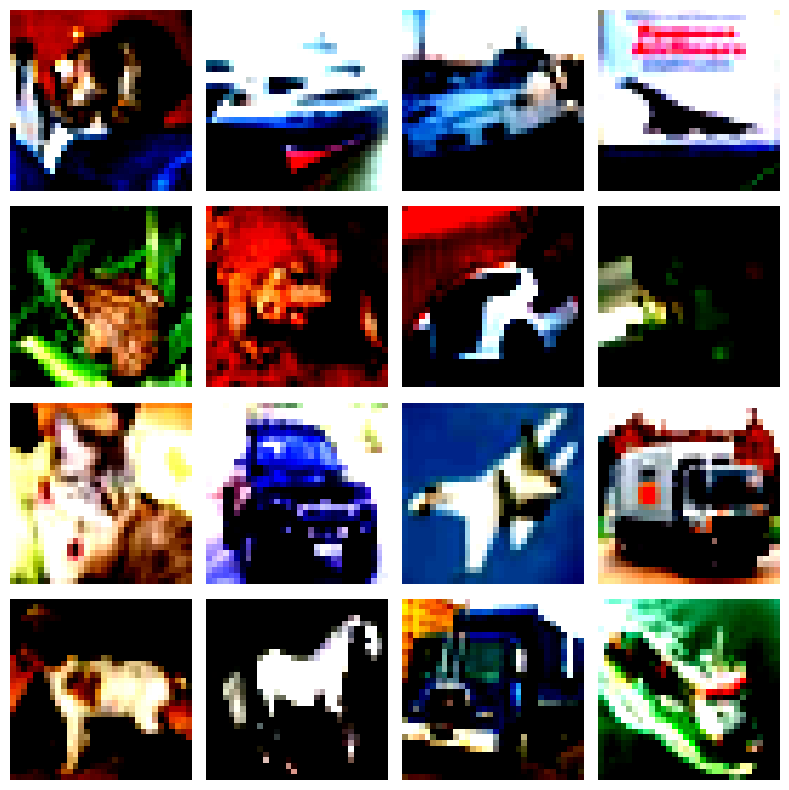

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
# mean-std normalization
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
show_imgs(x_test[0:16])

In [ ]:
# Load trained CNN Model
json_file = open('cifar10_cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
from keras.models import model_from_json
model = model_from_json(loaded_model_json)
model.load_weights("cifar10.weights.h5")

In [ ]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
indices = np.argmax(model.predict(x_test[0:16]),axis=1)
print([labels[x] for x in indices])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
['cat', 'ship', 'ship', 'ship', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship']
